In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

In [2]:
from lib.minority_game_vectorized import VectorizedMinorityGame
from lib.agents.factory_vectorized import VectorizedAgentFactory, VectorizedStrategyUpdatingAgentFactory
from lib.memory import UniformMemoryGenerator, NormalDistributionMemoryGenerator

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

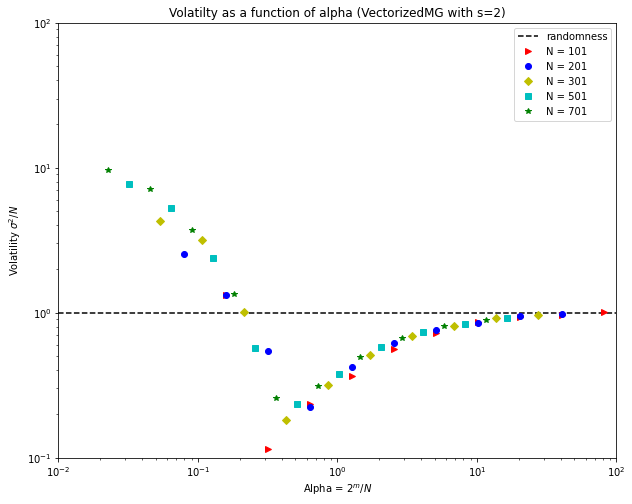

In [3]:
def n_agents_combined_graph():
    omega_graph = []
    alpha_graph = []

    N_agents = [101, 201, 301, 501, 701]
    graphs = [">r", "bo", "Dy", "sc", "*g"]

    for n_agents in N_agents:
        tot_omega = []
        tot_alpha = []

        for M in range (4,14):
            rng = default_rng(M)
            _, attendances = VectorizedMinorityGame(
                n_agents=n_agents,
                factory_dict={
                    0.2: VectorizedAgentFactory(
                        memory_generator=NormalDistributionMemoryGenerator(M, 0.5, rng)
                    ),
                    0.8: VectorizedAgentFactory(
                        memory_generator=UniformMemoryGenerator(M, rng)
                    )
                },
                rng=rng
            ).simulate_game(max_steps=50000)
            # in order to create the graph
            omega = np.var(attendances)/n_agents
            alpha = 2**M/n_agents
        
            tot_omega.append(omega)
            tot_alpha.append(alpha)

        omega_graph.append(tot_omega)
        alpha_graph.append(tot_alpha)

    # everything in one graph
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.axhline(y=1, color="k", linestyle="--", label="randomness") # vol = 1 -> randomness
    
    for i in range(len(graphs)):
        ax.plot(alpha_graph[i], omega_graph[i], graphs[i], label=f"N = {N_agents[i]}")

    ax.set_xlabel("Alpha = $2^m/N$")
    ax.set_ylabel("Volatility $\sigma^2/N$")
    ax.legend()

    plt.title("Volatilty as a function of alpha (VectorizedMG with s=2)")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([0.01, 100])
    plt.ylim([0.1, 100])

    plt.show()

n_agents_combined_graph()


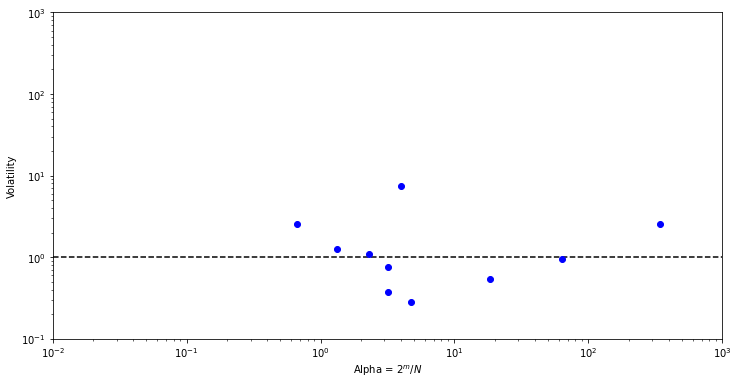

In [4]:
from lib.minority_game import MinorityGameIndividualAgents
from lib.agents.agent import Agent
from lib.agents.factory import AgentFactory
from lib.strategies import DefaultStrategy
from lib.memory import UniformMemoryGenerator, NormalDistributionMemoryGenerator

n_agents = 101
tot_omega_u_orig = []
tot_alpha_u_orig = []
M = 7
rng = default_rng(1337)
times, attendances, vol_A_t, n_agents_m, m_list, vol_A_t_individual_m_df = VectorizedMinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: VectorizedAgentFactory(
            memory_generator=NormalDistributionMemoryGenerator(M, 2, rng)
        )
    },
    rng=rng
).simulate_game(max_steps=100, return_individual=True)

# in order to create the graph
omega = np.average(vol_A_t)/n_agents
alpha = 2**M/n_agents
tot_omega_u_orig.append(omega)
tot_alpha_u_orig.append(alpha)

tot_omega_n = np.average(vol_A_t_individual_m_df)/n_agents_m['count']
tot_alpha_n =  2**n_agents_m['index']/n_agents_m['count']

fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
ax.plot(tot_alpha_n, tot_omega_n, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01, 1000])
plt.ylim([0.1, 1000])

plt.show()

(12,) (12,)


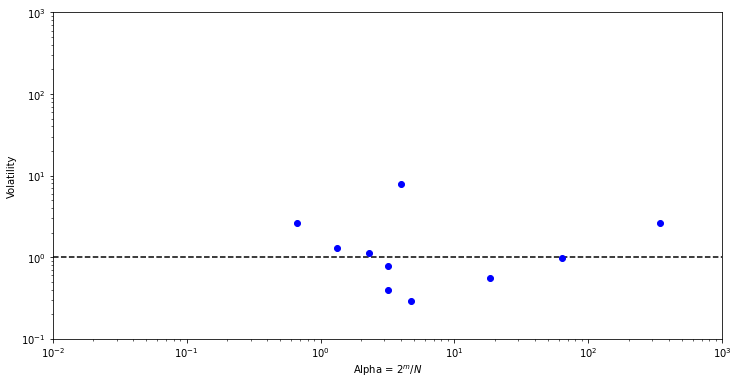

In [5]:
from lib.minority_game import MinorityGameIndividualAgents
from lib.agents.agent import Agent
from lib.agents.factory import AgentFactory
from lib.strategies import DefaultStrategy
from lib.memory import UniformMemoryGenerator, NormalDistributionMemoryGenerator

n_agents = 101
tot_omega_u_orig = []
tot_alpha_u_orig = []
M = 7
rng=default_rng(1337)
times, attendances, vol_A_t, n_agents_m, m_list, vol_A_t_individual_m_df = MinorityGameIndividualAgents(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=NormalDistributionMemoryGenerator(M, 2, rng=rng)
        ),
    },
    rng=rng
).simulate_game(max_steps=100)

# in order to create the graph
omega = np.average(vol_A_t)/n_agents
alpha = 2**M/n_agents
tot_omega_u_orig.append(omega)
tot_alpha_u_orig.append(alpha)

tot_omega_n = np.average(vol_A_t_individual_m_df)/n_agents_m['count']
tot_alpha_n =  2**n_agents_m['index']/n_agents_m['count']

fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
print(tot_alpha_n.shape, tot_omega_n.shape )
ax.plot(tot_alpha_n, tot_omega_n, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01, 1000])
plt.ylim([0.1, 1000])

plt.show()

In [6]:
def n_agents_combined_graph():
    omega_graph = []
    alpha_graph = []

    N_agents = [101, 201, 301, 501, 701]
    graphs = [">r", "bo", "Dy", "sc", "*g"]

    for n_agents in N_agents:
        tot_omega = []
        tot_alpha = []

        for M in range (4,14):
            rng = default_rng(M)
            _, attendances = VectorizedMinorityGame(
                n_agents=n_agents,
                factory_dict={
                    1: VectorizedStrategyUpdatingAgentFactory(
                        UniformMemoryGenerator(m=M, rng=rng),
                        strategy_update_rate=0.03,
                        strategy_update_fraction=0.7
                    )
                },
                rng=rng
            ).simulate_game(max_steps=10)
            # in order to create the graph
            omega = np.var(attendances)/n_agents
            alpha = 2**M/n_agents
        
            tot_omega.append(omega)
            tot_alpha.append(alpha)

        omega_graph.append(tot_omega)
        alpha_graph.append(tot_alpha)

    # everything in one graph
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.axhline(y=1, color="k", linestyle="--", label="randomness") # vol = 1 -> randomness
    
    for i in range(len(graphs)):
        ax.plot(alpha_graph[i], omega_graph[i], graphs[i], label=f"N = {N_agents[i]}")

    ax.set_xlabel("Alpha = $2^m/N$")
    ax.set_ylabel("Volatility $\sigma^2/N$")
    ax.legend()

    plt.title("Volatilty as a function of alpha (VectorizedMG with s=2)")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([0.01, 100])
    plt.ylim([0.1, 100])

    plt.show()

    n_agents_combined_graph()